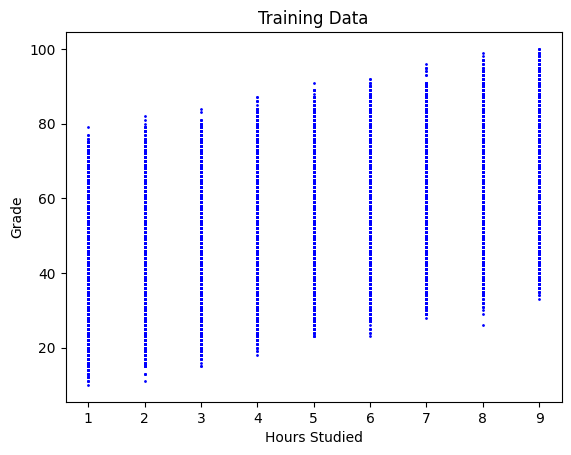

In [1]:
import matplotlib.pyplot as plt
import torch
from letsbuildmodels.datasets.student_performance import get_student_data

# Get the training and test data
train_dataloader, test_dataloader = get_student_data()

# Convert train_dataloader to x, y numpy arrays called x_vals and y_vals
x_vals = []
y_vals = []
for batch_x, batch_y in train_dataloader:
    x_vals.append(batch_x)
    y_vals.append(batch_y)

x_vals = torch.cat(x_vals).numpy()
y_vals = torch.cat(y_vals).numpy()

# Plot the data 
plt.scatter(x_vals, y_vals, color='blue', s=1, label='Data Points')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.title('Training Data')
plt.show()

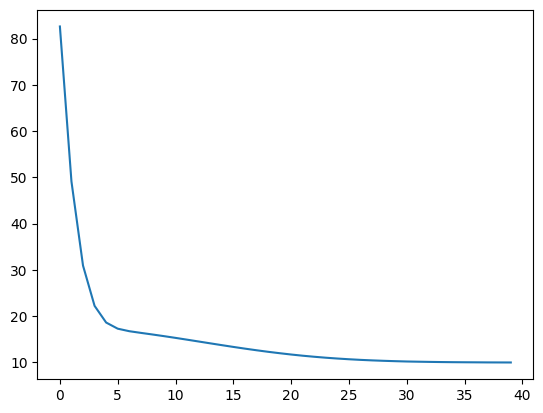

In [3]:
from letsbuildmodels.workflow import train
from letsbuildmodels.models.simple_linear import SimpleLinear
import torch.optim as optim
import torch.nn as nn

# Create the model   
model = SimpleLinear()

# Create the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Create the loss function
criterion = nn.MSELoss()

# Train the model
losses = train(model, train_dataloader, optimizer, criterion, epochs=40)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss')
plt.show()